In [3]:
import pandas as pd
import numpy as np

In [44]:
sales=pd.read_csv(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\Sales.csv',low_memory=False)
sales

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,Mobile Number,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON
0,2023-09-21 12:00:00.0000000,Posted,0.00,19963.36,0.0,000983,Mahendra Reddy,113-113R1-12,OER23141-D900X0C,001850847,...,9820697652,NaN,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
1,2023-09-21 12:00:00.0000000,Posted,0.00,13927.35,0.0,000983,Mahendra Reddy,113-113R1-14,ONP23013-D300R0B,001826223,...,9834151691,KOLHAPUR,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
2,2023-09-21 12:00:00.0000000,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,...,8554069898,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
3,2023-09-21 12:00:00.0000000,Posted,2723.76,88068.12,0.0,000983,Mahendra Reddy,118-118R1-18,OPE22050-D300X0C,001724103,...,8374038599,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
4,2023-09-22 12:00:00.0000000,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,...,8108407380,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248222,2024-09-29 12:00:00.0000000,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,...,NaN,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0
248223,2024-09-29 12:00:00.0000000,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,...,NaN,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
248224,2024-09-29 12:00:00.0000000,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,...,9880026593,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0
248225,2024-09-29 12:00:00.0000000,Posted,88994.25,355976.98,0.0,004767,Dipalee Matelkar,229-229R1-10691,OTN23V04-D400XMB,004404700,...,9755549597,NaN,NaN,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0


In [45]:
a=sales.groupby(['Product Category','PlainStudded','Parent Product Category','Product','Sub Product']).sum()
a['Gross Amount']

Product Category  PlainStudded  Parent Product Category  Product      Sub Product
Diamond Jewelry   General       Bracelet                 Bracelet     General          680421.75
                                Earring                  EARRING      General           10874.75
                                                         Earring      General          929238.17
                                General                  Mangalsutra  General           19862.00
                                Mangalsutra              Mangalsutra  General           10089.22
                                                                                        ...     
Platinum Jewelry  studded       Ring                     Ring         Couple Band      101088.32
                                                                      General          671269.74
Proto             Studded       General                  Peg Head     General               0.00
Silver Coin       Plain         Coin         

In [46]:
sales['Product'].unique()

array(['Earring', 'Nosewear', 'Pendant Earring', nan, 'Ring', 'Pendant',
       'Mangalsutra', 'Set Earring', 'Set Necklace', 'Bangle',
       'Silver Coin', 'Pendant Set', 'Necklace', 'Bracelet', 'Chain',
       'Gold Coin', 'Anklet', 'Peg Head', 'Loose Solitaire', 'RING',
       'Kada', 'Mang Tikka', 'chain', 'pendant', 'Bars', 'BANGLE',
       'PENDANT', 'EARRING', 'Others', 'Cufflink', 'Mangtika',
       'Ladies Ring', 'Ladies Bracelet', 'Tanmaniya', 'Gents Ring',
       'Chains', 'Openable', 'Non-Openable', 'Waist belt', 'Pendant set',
       'earring', 'ring', 'Gents Bracelet', 'Nosepin', 'Tanmaniya Chain',
       'bajubandh'], dtype=object)

In [47]:
sales['Sales Date']=sales['Sales Date'].astype('datetime64[ns]')

In [48]:
sales['new col']=sales['City']+'2'

In [49]:
sales.dropna(subset=['City','State'])

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
1,2023-09-21 12:00:00,Posted,0.00,13927.35,0.0,000983,Mahendra Reddy,113-113R1-14,ONP23013-D300R0B,001826223,...,KOLHAPUR,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,KOLHAPUR2
2,2023-09-21 12:00:00,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,...,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2
4,2023-09-22 12:00:00,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
5,2023-09-22 12:00:00,Posted,1839.75,25578.22,0.0,000983,Mahendra Reddy,118-118R1-67,MRG11040-D300TLB,001804667,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
7,2023-09-22 12:00:00,Posted,5145.67,47522.39,0.0,000983,Mahendra Reddy,112-112R1-57,ORG16307-D200XHB,001695541,...,New Delhi,DL,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,New Delhi2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248221,2024-09-29 12:00:00,Posted,59373.12,237492.49,0.0,001706,Mala R,104-104R1-10918,OBO17006-D400XGC,004436831,...,Bangalore,KA,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2
248222,2024-09-29 12:00:00,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,...,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0,Hyderabad2
248223,2024-09-29 12:00:00,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,...,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Goa Margaon2
248224,2024-09-29 12:00:00,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2


In [50]:
sales['Parent Product Category'].values

array(['Earring', 'Nosewear', 'Pendant Set', ..., 'Neckwear Set',
       'Mangalsutra', 'Bracelet'], dtype=object)

In [51]:
sales.drop(index=1)

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
0,2023-09-21 12:00:00,Posted,0.00,19963.36,0.0,000983,Mahendra Reddy,113-113R1-12,OER23141-D900X0C,001850847,...,NaN,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
2,2023-09-21 12:00:00,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,...,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2
3,2023-09-21 12:00:00,Posted,2723.76,88068.12,0.0,000983,Mahendra Reddy,118-118R1-18,OPE22050-D300X0C,001724103,...,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
4,2023-09-22 12:00:00,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
5,2023-09-22 12:00:00,Posted,1839.75,25578.22,0.0,000983,Mahendra Reddy,118-118R1-67,MRG11040-D300TLB,001804667,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248222,2024-09-29 12:00:00,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,...,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0,Hyderabad2
248223,2024-09-29 12:00:00,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,...,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Goa Margaon2
248224,2024-09-29 12:00:00,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2
248225,2024-09-29 12:00:00,Posted,88994.25,355976.98,0.0,004767,Dipalee Matelkar,229-229R1-10691,OTN23V04-D400XMB,004404700,...,NaN,NaN,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN


In [52]:
a=[1,32,34,56,43,56]
a
b=np.array(a)
b

array([ 1, 32, 34, 56, 43, 56])

In [53]:
b=b.astype('int32')

In [54]:
b

array([ 1, 32, 34, 56, 43, 56], dtype=int32)

In [55]:
def find_vk(a):
    return\
'V Kolhi' in a

find_vk(['V Kolhi','R Sharma','MS Dhoni'])

True

In [56]:
sales[['Gross Amount','Parent Product Category']].groupby('Parent Product Category')

In [57]:
sales.columns

Index(['Sales Date', 'Transaction Status', 'Discount', 'Gross Amount',
       'Net Sales Price', 'Sales Person Code', 'Sales Person Name',
       'Transaction ID', 'Design No', 'Serial Number', 'Customer ID',
       'DataAreaID', 'Warehouse', 'Store Name', 'Store Code', 'Type of Store',
       'Region', 'Sales Order ID', 'Customer Name', 'Bill No', 'Cost Price',
       'Weight Range', 'Sales Price', 'Price Range', 'Stone Value',
       'Diamond Value', 'Gold Value', 'Palladium Value', 'Platinum Value',
       'Hallmarking Value', 'Handling Value', 'Silver Value', 'Setting Value',
       'Labour Value', 'Wastage Amount', 'Second Wastage Amount',
       'Other Charges', 'IGI Amount', 'PGI Amount', 'TRANSDATE',
       'Product Category', 'PlainStudded', 'Type of jewellery', 'Collection',
       'Design Type', 'Kt', 'Brand', 'Sub Brand', 'Parent Product Category',
       'Product', 'Sub Product', 'Incentive Category', 'Gross Weight',
       'Revised Selling Price', 'GST Amount', 'URDType',

In [58]:
a=sales[['Product Category','PlainStudded','Gross Amount']].groupby(['Product Category','PlainStudded']).mean()
a


Gross Amount
Product Category PlainStudded                               
Diamond Jewelry  General                       105559.815753
                 Large Solitaire               443513.814495
                 Lilitaire                      68589.710278
                 Medium Solitaire              102291.977400
                 Plain                          17791.313594
                 Plain-Dual Metal               38601.368889
                 STUDDED                       175452.420000
                 Small Solitaire                61563.318176
                 Studded                        66622.398578
                 Studded - Dual Metal           57998.935567
                 Studded - TT                 -123063.488571
                 Studded- Duel metal           -26706.000000
                 plain                          29604.420000
                 studded                       100847.917087
FG_DJ            Studded                       -68579.000000
Gold Coin        Plain                           6270.069245
                 Studded                        34537.791250
Gold Jewelry     General                        98176.392000
                 Plain                          71980.718963
                 Studded                        61723.687500
                 plain                         295451.136667
Loose Solitaire  General                        91026.508938
                 Large Solitaire               432487.140000
                 Medium Solitaire               71300.000000
Platinum Jewelry General                       -43747.000000
                 Large Solitaire               460268.000000
                 Lilitaire                     -31219.000000
                 Medium Solitaire              103746.746124
                 PLAIN                         -22319.000000
                 Plain                          61973.573906
                 Plain - Dual Metal            -50123.000000
                 Plain-Dual Metal               63085.640365
                 Plain-TT                      -48774.284000
                 Small Solitaire                38612.479031
                 Small Solitaire - Dual Metal   33810.713420
                 Studded                        30118.281703
                 Studded - Dual Metal           38699.309157
                 Studded - TT                  -50543.500000
                 plain                          61469.518571
                 studded                        66311.184706
Proto            Studded                            0.000000
Silver Coin      Plain                            232.482123
Silver Jewelry   Plain                           1065.662338

<Axes: xlabel='Sales Date'>

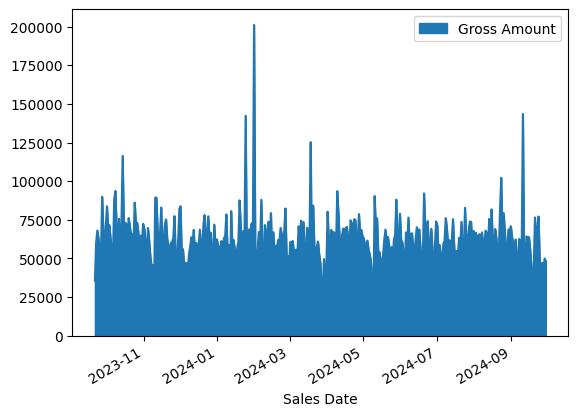

In [59]:
a=sales[sales['Product Category']=='Diamond Jewelry'][['Sales Date','Gross Amount']]\
    .groupby('Sales Date').mean()
a.sort_index(ascending=False).plot(kind='area')

In [60]:
# Grouping by 'Product Category' and summing 'Gross Amount'
grouped_sales = sales.groupby('Product Category')['Gross Amount'].sum()

# Now printing the result
print(grouped_sales)


Product Category
Diamond Jewelry     7.436733e+09
FG_DJ              -1.371580e+05
Gold Coin           1.746344e+08
Gold Jewelry        1.450733e+08
Loose Solitaire     1.071417e+08
Platinum Jewelry    6.607097e+08
Proto               0.000000e+00
Silver Coin         1.204606e+07
Silver Jewelry      1.545210e+06
Name: Gross Amount, dtype: float64


In [61]:
sales[sales['Type']=='Return'].select_dtypes(include='number').columns

Index(['Discount', 'Gross Amount', 'Net Sales Price', 'Warehouse',
       'Cost Price', 'Sales Price', 'Stone Value', 'Diamond Value',
       'Gold Value', 'Palladium Value', 'Platinum Value', 'Hallmarking Value',
       'Handling Value', 'Silver Value', 'Setting Value', 'Labour Value',
       'Wastage Amount', 'Second Wastage Amount', 'Other Charges',
       'IGI Amount', 'PGI Amount', 'Gross Weight', 'Revised Selling Price',
       'GST Amount', 'Qty', 'Diamond Weight', 'Diamond Pieces', 'Stone Weight',
       'Stone Pieces', 'Net Weight', 'No of GPP Accounts',
       'URD Discount Amount', 'OGADJUSTEDAMOUNT', 'URDADDLDEDUCITON'],
      dtype='object')

In [62]:
sales[sales['Type']=='Return'].select_dtypes(include='number')

,Discount,Gross Amount,Net Sales Price,Warehouse,Cost Price,Sales Price,Stone Value,Diamond Value,Gold Value,Palladium Value,...,Qty,Diamond Weight,Diamond Pieces,Stone Weight,Stone Pieces,Net Weight,No of GPP Accounts,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON
26,0.00,-14781.90,0.0,132,752.000000,826.10,0.0,0.00,0.00000,0.0,...,-1,0.00,0.0,0.0,0.0,10.000,NaN,0.0,0.0,0.0
31,0.00,-256021.52,0.0,168,146714.120000,254202.65,0.0,36860.00,95341.87000,0.0,...,-1,0.97,53.0,0.0,0.0,21.256,NaN,0.0,0.0,0.0
149,0.00,-81929.84,0.0,113,29529.020000,81365.97,0.0,16765.00,10463.20000,0.0,...,-1,0.59,110.0,0.0,0.0,3.002,NaN,0.0,0.0,0.0
150,0.00,-132872.12,0.0,113,61543.910000,126554.40,0.0,13790.00,40148.90000,0.0,...,-1,0.70,114.0,0.0,0.0,11.700,NaN,0.0,0.0,0.0
378,-31490.72,-94472.14,0.0,118,40007.020000,151495.00,0.0,35093.31,3397.60000,0.0,...,-1,0.49,2.0,0.0,0.0,1.592,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247659,-10352.09,-93168.81,0.0,121,34033.580000,102773.09,0.0,19695.00,11690.82700,0.0,...,-1,0.69,99.0,0.0,0.0,2.592,NaN,0.0,0.0,0.0
247660,-5406.17,-48655.55,0.0,235,31346.513120,54218.08,0.0,8664.00,19909.31712,0.0,...,-1,0.16,1.0,0.0,0.0,3.668,NaN,0.0,0.0,0.0
247661,-4474.98,-40274.86,0.0,235,19398.860160,44456.58,0.0,6210.00,11614.16416,0.0,...,-1,0.23,55.0,0.0,0.0,2.104,NaN,0.0,0.0,0.0
247662,-3554.50,-31990.51,0.0,245,19054.959999,35501.86,0.0,3270.00,13912.02000,0.0,...,-1,0.12,7.0,0.0,0.0,2.576,NaN,0.0,0.0,0.0


In [63]:
sales[sales['Type']=='Return'][['Cost Price','Sales Price','Stone Value','Diamond Value','Gold Value','Palladium Value','Diamond Weight'\
                               ,'Diamond Pieces','Stone Weight','Stone Pieces','Net Weight','URD Discount Amount','OGADJUSTEDAMOUNT'\
                                ,'URDADDLDEDUCITON','Platinum Value', 'Hallmarking Value',\
                                'Handling Value', 'Silver Value', 'Setting Value', 'Labour Value',\
                                'Wastage Amount', 'Second Wastage Amount', 'Other Charges',\
                                'IGI Amount', 'PGI Amount']]*-1

,Cost Price,Sales Price,Stone Value,Diamond Value,Gold Value,Palladium Value,Diamond Weight,Diamond Pieces,Stone Weight,Stone Pieces,...,Hallmarking Value,Handling Value,Silver Value,Setting Value,Labour Value,Wastage Amount,Second Wastage Amount,Other Charges,IGI Amount,PGI Amount
26,-752.000000,-826.10,-0.0,-0.00,-0.00000,-0.0,-0.00,-0.0,-0.0,-0.0,...,-0.00,-0.0,-745.0,-0.0,-7.00,-0.000,-0.0,-0.0,-0.0,-0.0
31,-146714.120000,-254202.65,-0.0,-36860.00,-95341.87000,-0.0,-0.97,-53.0,-0.0,-0.0,...,-0.01,-0.0,-0.0,-0.0,-10096.61,-4415.640,-0.0,-0.0,-0.0,-0.0
149,-29529.020000,-81365.97,-0.0,-16765.00,-10463.20000,-0.0,-0.59,-110.0,-0.0,-0.0,...,-0.01,-0.0,-0.0,-0.0,-1275.86,-624.960,-0.0,-0.0,-0.0,-0.0
150,-61543.910000,-126554.40,-0.0,-13790.00,-40148.90000,-0.0,-0.70,-114.0,-0.0,-0.0,...,-0.01,-0.0,-0.0,-0.0,-7605.01,-0.000,-0.0,-0.0,-0.0,-0.0
378,-40007.020000,-151495.00,-0.0,-35093.31,-3397.60000,-0.0,-0.49,-2.0,-0.0,-0.0,...,-35.00,-0.0,-0.0,-0.0,-1516.11,-0.000,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247659,-34033.580000,-102773.09,-0.0,-19695.00,-11690.82700,-0.0,-0.69,-99.0,-0.0,-0.0,...,-0.00,-0.0,-0.0,-0.0,-1644.69,-0.000,-0.0,-286.5,-0.0,-0.0
247660,-31346.513120,-54218.08,-0.0,-8664.00,-19909.31712,-0.0,-0.16,-1.0,-0.0,-0.0,...,-0.00,-0.0,-0.0,-0.0,-1558.90,-919.296,-0.0,-0.0,-295.0,-0.0
247661,-19398.860160,-44456.58,-0.0,-6210.00,-11614.16416,-0.0,-0.23,-55.0,-0.0,-0.0,...,-0.00,-0.0,-0.0,-0.0,-894.20,-540.496,-0.0,-0.0,-140.0,-0.0
247662,-19054.959999,-35501.86,-0.0,-3270.00,-13912.02000,-0.0,-0.12,-7.0,-0.0,-0.0,...,-0.00,-0.0,-0.0,-0.0,-1094.80,-643.140,-0.0,-0.0,-135.0,-0.0


In [64]:
v=(sales[sales['Type']=='Return'][['Cost Price','Sales Price','Stone Value','Diamond Value','Gold Value','Palladium Value','Diamond Weight'\
                               ,'Diamond Pieces','Stone Weight','Stone Pieces','Net Weight','URD Discount Amount','OGADJUSTEDAMOUNT'\
                                ,'URDADDLDEDUCITON','Platinum Value', 'Hallmarking Value',\
                                'Handling Value', 'Silver Value', 'Setting Value', 'Labour Value',\
                                'Wastage Amount', 'Second Wastage Amount', 'PGI Amount']]<0).any()
print(v)

Cost Price               False
Sales Price              False
Stone Value              False
Diamond Value            False
Gold Value               False
Palladium Value          False
Diamond Weight           False
Diamond Pieces           False
Stone Weight             False
Stone Pieces             False
Net Weight               False
URD Discount Amount      False
OGADJUSTEDAMOUNT         False
URDADDLDEDUCITON         False
Platinum Value           False
Hallmarking Value        False
Handling Value           False
Silver Value             False
Setting Value            False
Labour Value             False
Wastage Amount           False
Second Wastage Amount    False
PGI Amount               False
dtype: bool


In [65]:
a=(sales[sales['Type']=='Return'].select_dtypes(include='number')<0).any()
print(a)

Discount                  True
Gross Amount              True
Net Sales Price          False
Warehouse                False
Cost Price               False
Sales Price              False
Stone Value              False
Diamond Value            False
Gold Value               False
Palladium Value          False
Platinum Value           False
Hallmarking Value        False
Handling Value           False
Silver Value             False
Setting Value            False
Labour Value             False
Wastage Amount           False
Second Wastage Amount    False
Other Charges             True
IGI Amount                True
PGI Amount               False
Gross Weight              True
Revised Selling Price     True
GST Amount                True
Qty                       True
Diamond Weight           False
Diamond Pieces           False
Stone Weight             False
Stone Pieces             False
Net Weight               False
No of GPP Accounts       False
URD Discount Amount      False
OGADJUST

In [66]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248227 entries, 0 to 248226
Data columns (total 81 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Sales Date               248227 non-null  datetime64[ns]
 1   Transaction Status       248227 non-null  object        
 2   Discount                 248227 non-null  float64       
 3   Gross Amount             248227 non-null  float64       
 4   Net Sales Price          248227 non-null  float64       
 5   Sales Person Code        245458 non-null  object        
 6   Sales Person Name        243725 non-null  object        
 7   Transaction ID           248227 non-null  object        
 8   Design No                248227 non-null  object        
 9   Serial Number            210600 non-null  object        
 10  Customer ID              248225 non-null  object        
 11  DataAreaID               248227 non-null  object        
 12  Warehouse       

In [67]:
sales.select_dtypes(include='d')

,Discount,Gross Amount,Net Sales Price,Cost Price,Sales Price,Stone Value,Diamond Value,Gold Value,Palladium Value,Platinum Value,...,GST Amount,Diamond Weight,Diamond Pieces,Stone Weight,Stone Pieces,Net Weight,No of GPP Accounts,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON
0,0.00,19963.36,0.0,8573.220000,19683.22,0.00,2640.0,4933.220,0.0,0.0,...,598.90,0.11,8.0,0.00,0.0,1.418,NaN,0.0,0.0,0.0
1,0.00,13927.35,0.0,5444.540000,13836.36,0.00,2660.0,1684.530,0.0,0.0,...,417.82,0.07,7.0,0.00,0.0,0.376,NaN,0.0,0.0,0.0
2,2309.13,20782.16,0.0,9316.660000,25189.20,0.00,4080.0,4439.150,0.0,0.0,...,623.46,0.17,30.0,0.00,0.0,1.276,NaN,0.0,0.0,0.0
3,2723.76,88068.12,0.0,33754.920000,90175.10,0.00,26460.0,6075.720,0.0,0.0,...,2642.04,0.64,50.0,0.00,0.0,1.882,NaN,0.0,0.0,0.0
4,0.00,-29464.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.0,0.00,0.0,0.000,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248222,71452.05,285808.22,0.0,173194.170000,355215.23,2613.00,46207.0,105791.685,0.0,0.0,...,8574.24,1.13,244.0,19.05,14.0,23.774,NaN,0.0,0.0,0.0
248223,71584.61,328437.45,0.0,187933.759991,393891.11,0.00,54860.0,109896.380,0.0,0.0,...,9853.12,2.11,236.0,0.00,0.0,25.568,NaN,0.0,0.0,0.0
248224,76655.78,231500.58,0.0,133453.159992,303854.06,633.00,43250.0,75783.950,0.0,0.0,...,6945.02,1.73,255.0,2.11,9.0,17.942,1.0,0.0,0.0,0.0
248225,88994.25,355976.98,0.0,215680.850003,437157.42,0.01,56272.0,141834.400,0.0,0.0,...,10679.30,1.98,346.0,15.75,1.0,25.344,NaN,0.0,0.0,0.0


In [68]:
sales['Sales Date']=sales['Sales Date'].astype('date64[pyarrow]')

In [69]:
sales[sales['Sales Person Name'].fillna('Na').str.contains('Mahendra')][['Sales Person Name','Gross Amount']].groupby('Sales Person Name').sum()

,Gross Amount
Sales Person Name,
Mahendra Reddy,7610221.14
Mahendra Vyas,1871.40
Umang Mahendra,0.00


In [70]:
s=sales.set_index('Sales Date').copy()
s.index.rename('Date',inplace=1)
s

,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,Customer ID,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-21,Posted,0.00,19963.36,0.0,000983,Mahendra Reddy,113-113R1-12,OER23141-D900X0C,001850847,1130505976,...,NaN,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
2023-09-21,Posted,0.00,13927.35,0.0,000983,Mahendra Reddy,113-113R1-14,ONP23013-D300R0B,001826223,C_000109319,...,KOLHAPUR,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,KOLHAPUR2
2023-09-21,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,C_000100561,...,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2
2023-09-21,Posted,2723.76,88068.12,0.0,000983,Mahendra Reddy,118-118R1-18,OPE22050-D300X0C,001724103,C_000049865,...,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
2023-09-22,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,1270510189,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-29,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,C_000296240,...,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0,Hyderabad2
2024-09-29,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,C_000296264,...,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Goa Margaon2
2024-09-29,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,C_000221767,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2


In [71]:
s.rename_axis('Sales Date',inplace=True)
s.reset_index(inplace=True)
s.rename_axis(None,inplace=True)
s

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
0,2023-09-21,Posted,0.00,19963.36,0.0,000983,Mahendra Reddy,113-113R1-12,OER23141-D900X0C,001850847,...,NaN,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
1,2023-09-21,Posted,0.00,13927.35,0.0,000983,Mahendra Reddy,113-113R1-14,ONP23013-D300R0B,001826223,...,KOLHAPUR,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,KOLHAPUR2
2,2023-09-21,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,...,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2
3,2023-09-21,Posted,2723.76,88068.12,0.0,000983,Mahendra Reddy,118-118R1-18,OPE22050-D300X0C,001724103,...,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
4,2023-09-22,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248222,2024-09-29,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,...,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0,Hyderabad2
248223,2024-09-29,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,...,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Goa Margaon2
248224,2024-09-29,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2
248225,2024-09-29,Posted,88994.25,355976.98,0.0,004767,Dipalee Matelkar,229-229R1-10691,OTN23V04-D400XMB,004404700,...,NaN,NaN,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN


In [72]:
s[s.duplicated()]

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
2800,2023-10-19,Posted,0.0,0.02,0.0,000031,Delhi SX .,112-112R1-1356,MP,NaN,...,New Delhi,DL,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,New Delhi2
2805,2023-10-19,Posted,0.0,0.02,0.0,002317,Chitrapratima .,168-168R1-1284,MP,NaN,...,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,NaN
2808,2023-10-19,Posted,0.0,0.02,0.0,002576,Neetu Sharma,162-162R1-328,MP,NaN,...,Gwalior,MP,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Gwalior2
2811,2023-10-19,Posted,0.0,0.02,0.0,003235,Aishwarya Shivbaran Gupta .,169-169R1-187,MP,NaN,...,PUNE,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,PUNE2
2814,2023-10-19,Posted,0.0,0.02,0.0,003450,Shiv Kumar Chari,187-187R1-169,MP,NaN,...,Hyderabad,TS,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Hyderabad2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247887,2024-09-29,Posted,0.0,0.02,0.0,005388,SUBRAJITH DALAI,212-212R1-7649,MP,NaN,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Bangalore2
247890,2024-09-29,Posted,0.0,0.02,0.0,005444,Esha Sharma,132-132R1-14700,MP,NaN,...,Noida,UP,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Noida2
247893,2024-09-29,Posted,0.0,0.02,0.0,005828,Chethan,218-218R1-8415,MP,NaN,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Bangalore2
247896,2024-09-29,Posted,0.0,0.02,0.0,005963,NIDHI SHARMA,188-188R1-10073,MP,NaN,...,Noida,UP,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,Noida2


In [73]:
s.filter([2800,28001],axis=0)

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
2800,2023-10-19,Posted,0.00,0.02,0.0,000031,Delhi SX .,112-112R1-1356,MP,NaN,...,New Delhi,DL,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,NaN,NaN,NaN,New Delhi2
28001,2023-11-10,Posted,819.55,0.00,0.0,002968,Adhik,103-103R1-1220,OCO22001-D000Y0E,002025549,...,Mumbai,MH,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2


In [74]:
test={
    'col1':'Visaal',
    'col2':'Peter',
    'col3':'Harry'
}
for x in test.values():
    print(x+' hai bkl')

Visaal hai bkl
Peter hai bkl
Harry hai bkl


In [75]:
test2=['visaal','peter','harry']
for x in test2:
    print(x)

visaal
peter
harry


In [76]:
s.sort_index(axis=0,ascending=False)

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,City,State,Emp Desgination,Emp LastDateWorked,Pan Number,TypeforSuspendedTrans,URD Discount Amount,OGADJUSTEDAMOUNT,URDADDLDEDUCITON,new col
248226,2024-09-29,Posted,104425.15,313275.45,0.0,005888,SANJAY SHARMA,243-243R1-3593,OBF23031-A300WEB,004196577,...,Ahmedabad,GJ,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Ahmedabad2
248225,2024-09-29,Posted,88994.25,355976.98,0.0,004767,Dipalee Matelkar,229-229R1-10691,OTN23V04-D400XMB,004404700,...,NaN,NaN,Sales Officer,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
248224,2024-09-29,Posted,76655.78,231500.58,0.0,005388,SUBRAJITH DALAI,212-212R1-7641,OSN23050-D911X1C,004331496,...,Bangalore,KA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Bangalore2
248223,2024-09-29,Posted,71584.61,328437.45,0.0,004170,Sultan Shah Makandar .,165-165R2-6911,OSN23056-D900X1C,004404822,...,Goa Margaon,GA,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Goa Margaon2
248222,2024-09-29,Posted,71452.05,285808.22,0.0,005410,NaN,118-118R1-17837,OSE22192-D309R0B,001845314,...,Hyderabad,TS,NaN,NaN,NaN,Sales,0.0,0.0,0.0,Hyderabad2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-09-22,Posted,0.00,-29464.00,0.0,000983,Mahendra Reddy,118-118R1-64,Other Gold,NaN,...,BEGUMPET,TS,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,BEGUMPET2
3,2023-09-21,Posted,2723.76,88068.12,0.0,000983,Mahendra Reddy,118-118R1-18,OPE22050-D300X0C,001724103,...,NaN,NaN,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,NaN
2,2023-09-21,Posted,2309.13,20782.16,0.0,000983,Mahendra Reddy,197-197R1-26,OPE20027-D900X0C,001849961,...,Mumbai,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,Mumbai2
1,2023-09-21,Posted,0.00,13927.35,0.0,000983,Mahendra Reddy,113-113R1-14,ONP23013-D300R0B,001826223,...,KOLHAPUR,MH,NaN,1900-01-01 00:00:00.0000000,NaN,Sales,0.0,0.0,0.0,KOLHAPUR2


In [77]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('test_space').getOrCreate()

pydf=spark.createDataFrame(s)
pydf.show(truncate=False)
pydf.printSchema()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
RuntimeError: reentrant call inside <_io.BufferedReader name=3344>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\py4j\clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error 

Py4JError: An error occurred while calling None.org.apache.spark.sql.SparkSession

In [ ]:
from pyspark.sql.functions import *
pydf_w_nulls=pydf.select(nanvl(col('Sub Brand'),lit(None)).alias('Sub Brand'))

pydf_filled=pydf_w_nulls.na.fill({'Sub Brand':'uksb'}).distinct()
pydf_filled.show()

In [ ]:
pydf.select(col('Parent Product Category')).distinct().show()

In [ ]:
from pyspark.sql.functions import *
pydf.filter(col('Parent Product Category').isNull())# Filter for null values in 'Parent Product Category'
null_rows = pydf.filter(col("`Parent Product Category`")=='NaN')

# Show the rows with null values
null_rows.show(truncate=False)

In [ ]:
x=s[(s['City']=='Delhi')|(s['City']=='Thane')][['Discount','City','Gross Amount']].groupby('City')\
    .agg(Total_Disc=('Discount','sum'),\
         Avg_gross=('Gross Amount','mean'))
x
# x.plot(kind='bar')

In [ ]:
u=s[['Discount','City']].groupby('City').sum()
u

In [ ]:
# Filter the DataFrame for City == 'Delhi'
filtered_df = pydf.filter((col('City') == 'Delhi')|( col('City')=='Thane'))

# Select and alias the City column
result_df = filtered_df.select(col('City').alias('City'), 'Customer ID', 'Discount','Gross Amount')

grouped_df=result_df.groupBy('City').agg(sum('Discount').alias('TotalDisc'),
                                         avg('Gross Amount').alias('TotalGA'))
# Show the result
grouped_df.show()

In [ ]:
s

In [293]:
statement=pd.read_excel(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\statement0310-1010.xlsx',header=0)

In [296]:
statement

array([[Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2A/427781454511/AARJAV DE/Bank of B/UPI', '-', 166, 363.73,
        328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2M/427725422922/IRCTC UTS/Yes Bank Ltd', 95, '-', 268.73,
        328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2M/464391113371/Google India Service/ICICI Bank', 19, '-',
        249.73, 328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2M/464352679093/PAYTM APP/HDFC Bank', 40, '-', 209.73, 328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'MAHAPATRA UNIVE/SALARY SEPTEMBER 2024', '-', 27521, 27730.73,
        328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2A/427787853978/ANKUR SUDHAKAR SHETT/SBI', 1100, '-',
        26630.73, 328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'UPI/P2A/464344648596/SUSHIL YOGENDRA CHAUH/SBI', 1000, '-',
        25630.73, 328],
       [Timestamp('2024-10-03 00:00:00'), '-',
        'U

In [ ]:
statement[statement['VendorName'].fillna('ukpat').str.contains('ZOMATO')][['VendorName','Debit']]\
.groupby('VendorName').sum()

In [ ]:
statement['Tran Date']=statement['Tran Date'].astype('datetime64[ms]')

In [ ]:
dtf=pd.to_datetime(['2024-10-06','2024-10-07'])

In [ ]:
statement[statement['Tran Date'].isin(dtf)].sort_values('VendorName')[['VendorName','Debit']]

In [ ]:
statement['Credit']=statement['Credit'].replace('-',0)

In [ ]:
statement['Credit']=statement['Credit'].astype('float64')

In [ ]:
print(statement['Debit'].agg({'total':'sum','avg':'mean'}))

In [ ]:
statement['Debit'].sum()

In [ ]:
stm=spark.createDataFrame(statement)
stm.show()

In [ ]:
uy=stm.filter(to_date(col('Tran Date')).isin('2024-10-06','2024-10-07'))
uy.orderBy('VendorName').select('VendorName',col('Debit').alias('loude lage')).show()

In [ ]:
qw=stm.filter(col('Particulars').contains('ZOMATO'))
qw.show()

In [ ]:
# stm=stm.withColumn('VendorNamewPys',split(col('Particulars'),'/').getItem(3))
stm.limit(4).orderBy(col('Balance').desc()).show(truncate=False)

In [ ]:
# statement['Particulars'].str.split('/').str[4]
oro=stm.select(col('Tran Date').cast('date').alias('cast_to_date'))\
    .distinct().orderBy(col('cast_to_date').desc())
oro.show()
sel_dates=['2024-10-08','2024-10-05']

oro.filter(col('cast_to_date').isin(sel_dates)).show()

In [ ]:
oro.select(col('cast_to_date').isNotNull()).show()

In [ ]:
statement.sort_values(['Tran Date','VendorName'],ascending=[True,False]).fillna({'VendorName':\
                                                                                 'NaVendor'})

In [ ]:
stm.orderBy('Tran Date',col('VendorName').desc()).show()

In [ ]:
stm=stm.withColumnRenamed('Init. Br','Initial Balance')
stm.show()

In [ ]:
stm.select(
    col('VendorName').alias('VendorNamewpd'),  # Alias the 'VendorName' column
    *[col(c) for c in stm.columns if c != 'VendorName']  # Select all other columns as they are
).show(truncate=False)

In [22]:
import pandas as pd

# Sample DataFrame 1
data1 = {
    'MatchNumber': [1, 2, 3, 4, 5],
    'TeamA': ['Mumbai Indians', 'Chennai Super Kings', 'Delhi Capitals', 'Royal Challengers', 'Sunrisers Hyderabad'],
    'ScoreA': [180, 150, 200, 170, 190]
}

df1 = pd.DataFrame(data1)

# Sample DataFrame 2
data2 = {
    'MatchNumber': [3, 4, 5, 6, 7],
    'TeamA': ['Rajasthan Royals', 'Punjab Kings', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians'],
    'ScoreA': [160, 140, 190, 175, 210]
}

df2 = pd.DataFrame(data2)

# Merging the two DataFrames on MatchNumber
merged_df = pd.merge(df1, df2, left_on='MatchNumber',right_on='MatchNumber', how='inner')

# Displaying the merged DataFrame
merged_df

,MatchNumber,TeamA_x,ScoreA_x,TeamA_y,ScoreA_y
0,3,Delhi Capitals,200,Rajasthan Royals,160
1,4,Royal Challengers,170,Punjab Kings,140
2,5,Sunrisers Hyderabad,190,Kolkata Knight Riders,190


In [15]:
merged_df1=merged_df.copy

In [41]:
new=pd.concat([df1['TeamA'],df2['TeamA']],ignore_index=True)
chk=new.duplicated()

pandas.core.series.Series

In [56]:
st1=statement.head(3)
st2=statement.tail(3)
st1

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init. Br
0,2024-10-03,-,UPI/P2A/427781454511/AARJAV DE/Bank of B/UPI,-,166,363.73,328
1,2024-10-03,-,UPI/P2M/427725422922/IRCTC UTS/Yes Bank Ltd,95,-,268.73,328
2,2024-10-03,-,UPI/P2M/464391113371/Google India Service/ICIC...,19,-,249.73,328


In [57]:
st3=pd.concat([st1,st2],ignore_index=True)[['Tran Date','Debit','Credit','Balance']]
# st3.groupby('Tran Date').sum().reset_index()\
# Replace and infer object types to avoid warnings
# Replace and convert the type explicitly
st3['Credit'] = st3['Credit'].replace('-', 0).astype(float)  # or int based on your requirement
st3['Debit'] = st3['Debit'].replace('-', 0).astype(float)   # or int based on your requirement

st3.groupby('Tran Date').sum().filter(items=['Debit','Credit']).reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_25820\3072271483.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  st3['Credit'] = st3['Credit'].replace('-', 0).astype(float)  # or int based on your requirement
C:\Users\Dell\AppData\Local\Temp\ipykernel_25820\3072271483.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  st3['Debit'] = st3['Debit'].replace('-', 0).astype(float)   # or int based on your requirement


,Tran Date,Debit,Credit
0,2024-10-03,114.0,166.0
1,2024-10-09,159.0,0.0


In [129]:
st3['Credit'].name

'Credit'

Mean Squared Error: 510204.0816326575
R^2 Score: nan


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


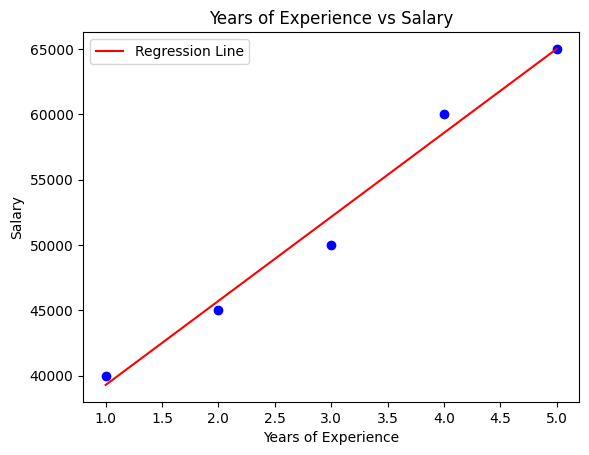

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data
data = {
    'YearsExperience': [1, 2, 3, 4, 5],
    'Salary': [40000, 45000, 50000, 60000, 65000]
}
df = pd.DataFrame(data)

# Defining the independent variable (X) and dependent variable (y)
X = df[['YearsExperience']]
y = df['Salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.scatter(X, y, color='blue')  # original data

# Create a range of values for YearsExperience to plot the regression line
years_range = np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 100).reshape(-1, 1)
salary_pred = model.predict(years_range)

# Plot the regression line
plt.plot(years_range, salary_pred, color='red', label='Regression Line')  # regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()


Mean Squared Error: 1224.744871391589
R^2 Score: 0.9825581395348837


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


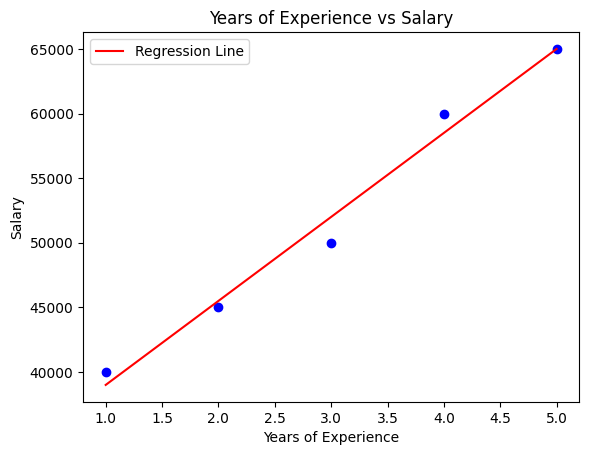

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Sample data
data = {
    'YearsExperience': [1, 2, 3, 4, 5],
    'Salary': [40000, 45000, 50000, 60000, 65000]
}
df = pd.DataFrame(data)

# Defining the independent variable (X) and dependent variable (y)
X = df[['YearsExperience']]
y = df['Salary']

# Creating and fitting the model
model = LinearRegression()
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Evaluating the model
mse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plotting the results
plt.scatter(X, y, color='blue')  # original data

# Create a range of values for YearsExperience to plot the regression line
years_range = np.linspace(X['YearsExperience'].min(), X['YearsExperience'].max(), 100).reshape(-1, 1)
salary_pred = model.predict(years_range)

# Plot the regression line
plt.plot(years_range, salary_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df1=pd.read_csv(r'D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\Sales1810.csv',low_memory=False)
df1.head()

,dataAreaId,Sales Date,Store,Transaction Id,lineNum,Total Discount,Bill No,Serial Number,price,Gross Amount,...,Qty,Coupon Discount,Periodic Discount,Empowerment Discount,Coupons,transTime,SALETYPE,URDTYPE,Sale Type New,Sale Time
0,ofjl,2024-10-18 12:00:00.0000000 +00:00,217,217-217R1-15781,3.0,97596.26,217R124IN0000759,004169313,391896.92,-294300.66,...,1,NaN,NaN,NaN,NaN,52243,NaN,NaN,Sale,14:30:43
1,ofjl,2024-10-18 12:00:00.0000000 +00:00,217,217-217R1-15782,3.0,94055.26,367,004169313,391896.92,-297841.66,...,1,NaN,NaN,NaN,NaN,48407,NaN,NaN,Sale,13:26:47
2,ofjl,2024-10-18 12:00:00.0000000 +00:00,188,188-188R1-10667,1.0,10493.94,188R124IN0000804,004257930,69959.62,-59465.68,...,1,NaN,NaN,NaN,NaN,48931,NaN,NaN,Sale,13:35:31
3,ofjl,2024-10-18 12:00:00.0000000 +00:00,113,113-113R1-15230,1.0,4320.33,113R124IN0001265,004439633,43203.34,-38883.01,...,1,NaN,NaN,NaN,NaN,55794,NaN,NaN,Sale,15:29:54
4,ofjl,2024-10-18 12:00:00.0000000 +00:00,188,188-188R1-10673,3.0,0.00,188R124IN0000805,004457514,44658.69,-44658.69,...,1,NaN,NaN,NaN,NaN,52233,NaN,NaN,Sale,14:30:33


In [177]:
df=df1.copy()

In [180]:
df['Gross Amount'] = df.loc[:, 'Gross Amount'] * -1

In [184]:
df

,dataAreaId,Sales Date,Store,Transaction Id,lineNum,Total Discount,Bill No,Serial Number,price,Gross Amount,...,Periodic Discount,Empowerment Discount,Coupons,transTime,SALETYPE,URDTYPE,Sale Type New,Sale Time,Sale Time (Seconds),Time Bins
0,ofjl,2024-10-18 12:00:00.0000000 +00:00,217,217-217R1-15781,3.0,97596.26,217R124IN0000759,004169313,391896.92,294300.66,...,NaN,NaN,NaN,52243,NaN,NaN,Sale,14:30:43,52243,14:00 - 15:00
1,ofjl,2024-10-18 12:00:00.0000000 +00:00,217,217-217R1-15782,3.0,94055.26,367,004169313,391896.92,297841.66,...,NaN,NaN,NaN,48407,NaN,NaN,Sale,13:26:47,48407,13:00 - 14:00
2,ofjl,2024-10-18 12:00:00.0000000 +00:00,188,188-188R1-10667,1.0,10493.94,188R124IN0000804,004257930,69959.62,59465.68,...,NaN,NaN,NaN,48931,NaN,NaN,Sale,13:35:31,48931,13:00 - 14:00
3,ofjl,2024-10-18 12:00:00.0000000 +00:00,113,113-113R1-15230,1.0,4320.33,113R124IN0001265,004439633,43203.34,38883.01,...,NaN,NaN,NaN,55794,NaN,NaN,Sale,15:29:54,55794,15:00 - 16:00
4,ofjl,2024-10-18 12:00:00.0000000 +00:00,188,188-188R1-10673,3.0,0.00,188R124IN0000805,004457514,44658.69,44658.69,...,NaN,NaN,NaN,52233,NaN,NaN,Sale,14:30:33,52233,14:00 - 15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,ofjl,2024-10-18 12:00:00.0000000 +00:00,103,103-103R4-1344,2.0,9140.31,103R424IN0000098,001791590,59993.08,50852.77,...,NaN,NaN,NaN,62861,NaN,NaN,Sale,17:27:41,62861,17:00 - 18:00
370,ofjl,2024-10-18 12:00:00.0000000 +00:00,153,153-153R1-10662,2.0,33128.32,153R124IN0000488,004452425,645000.00,611871.68,...,NaN,NaN,NaN,63390,NaN,NaN,Sale,17:36:30,63390,17:00 - 18:00
371,ofjl,2024-10-18 12:00:00.0000000 +00:00,144,144-144R1-13870,1.0,23740.93,144R124IN0001584,004258650,237409.30,213668.37,...,NaN,NaN,NaN,57852,NaN,NaN,Sale,16:04:12,57852,16:00 - 17:00
372,ofjl,2024-10-18 12:00:00.0000000 +00:00,103,103-103R4-1350,1.0,9038.52,103R424IN0000099,004176974,90385.20,81346.68,...,NaN,NaN,NaN,65522,NaN,NaN,Sale,18:12:02,65522,18:00 - 19:00


In [183]:
# Convert 'Sale Time' to datetime and then extract the time
df['Sale Time'] = pd.to_datetime(df['Sale Time'], format='%H:%M:%S').dt.time

# Convert 'Sale Time' to total seconds since midnight
df['Sale Time (Seconds)'] = df['Sale Time'].apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

# Create bins for every hour (3600 seconds = 1 hour)
bins = [i * 3600 for i in range(25)]  # 0 to 24 hours in seconds

# Assign labels for each hour
hour_labels = [f'{i:02d}:00 - {i+1:02d}:00' for i in range(24)]

# Bin the 'Sale Time (Seconds)' column using hourly intervals
df['Time Bins'] = pd.cut(df['Sale Time (Seconds)'], bins=bins, labels=hour_labels, right=False)

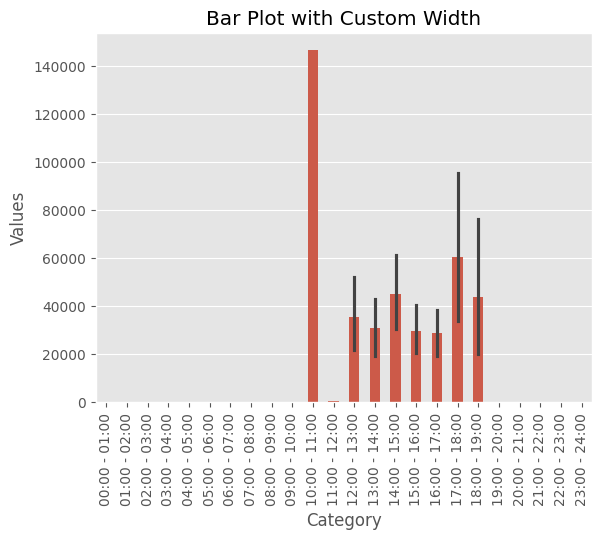

In [189]:
# Plotting the stacked bar chart
sns.barplot(x='Time Bins', y='Gross Amount', data=df, width=0.5)  # Change width here

# Show the plot
plt.title("Bar Plot with Custom Width")
plt.xlabel("Category")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [190]:
df['Gross Amount'].sum()

np.float64(14175151.0)

In [10]:
statement['Debit']=statement['Debit'].replace('-',0)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19720\2097154700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  statement['Debit']=statement['Debit'].replace('-',0)


In [12]:
statement['Debit']=statement["Debit"].astype('float64')

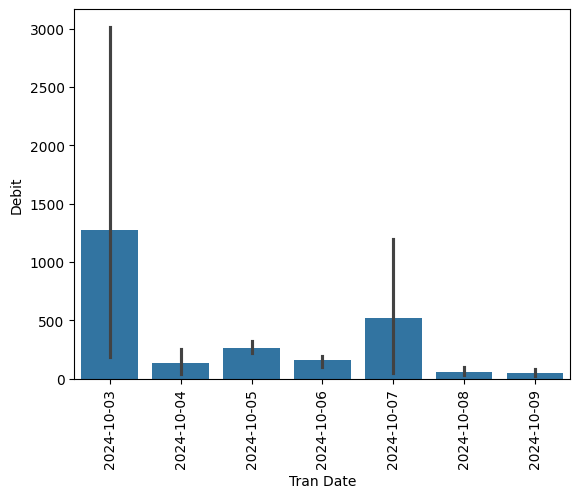

In [16]:
sns.barplot(x='Tran Date',y='Debit',data=statement)
plt.xticks(rotation=90)
plt.show()

0
3
8
1
10
1
3
8
1
10
2
3
8
1
10
3
3
8
1
10


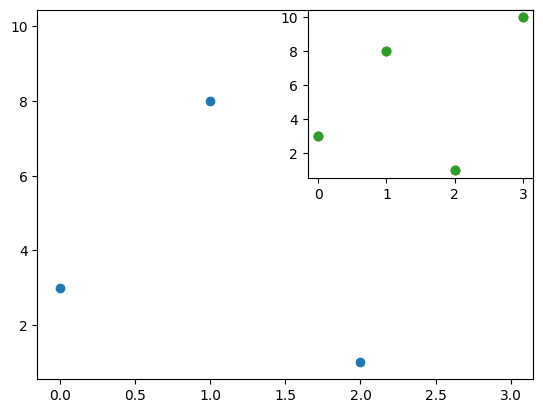

In [17]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

for i in x:
    print(i)
    plt.scatter(x,y)
    for j in y:
        plt.subplot(2, 2, 2)
        
        print(j)
        

    






plt.show()

In [32]:
a=np.arange(1,6)
print(a)

for i in a[::-1]:
    print(' '+'*'*2*i)

[1 2 3 4 5]
 **********
 ********
 ******
 ****
 **


In [34]:
n = 5  # Number of levels for the pyramid

for i in range(1, n+1):
    print(' ' * (n - i) + '*' * (2 * i-1))


    *
   ***
  *****
 *******
*********


In [40]:
a=np.arange(0,5)
b=np.arange(10,15)
print(a)
print(b)
print(a*b)

[0 1 2 3 4]
[10 11 12 13 14]
[ 0 11 24 39 56]


In [46]:
c=np.random.random((3,4))
print(c)

[[0.40180729 0.31522371 0.22557066 0.68183248]
 [0.6004348  0.02851493 0.93197129 0.82676612]
 [0.25861094 0.490006   0.40084614 0.18000424]]


In [112]:
d=np.identity(3,dtype=int)*4
d

array([[4, 0, 0],
       [0, 4, 0],
       [0, 0, 4]])

In [113]:
e=np.identity(3,dtype=int)*-2
e

array([[-2,  0,  0],
       [ 0, -2,  0],
       [ 0,  0, -2]])

In [114]:
f=np.dot(d,e)
f

array([[-8,  0,  0],
       [ 0, -8,  0],
       [ 0,  0, -8]])

In [127]:
g=np.random.random((4,2))
g.ravel()

array([0.63853295, 0.75545638, 0.6309088 , 0.34966467, 0.67959349,
       0.32985568, 0.98281107, 0.87288542])

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sales=pd.read_csv(r"D:\GdriveBackup\0.Projects\Mock Projects\DE\Python\sales24102024.csv",low_memory=False)
sales.head(1)

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,Sales Person Code New,Coupon Discount,Periodic Discount,Empowerment Discount,Coupons,Magic Price Discount,Procurement Type,buddystaffid,Making Discount,Wastage Discount
0,2024-04-04 12:00:00.0000000,Posted,10566.64,95099.74,0.0,003119,Santosh Verma,114-114R2-1204,OBF16780-D400XEC,004168160,...,003119,0.0,10566.64,0.0,Diamond Festival 24- Dia (O+W),0.0,JobWork,NaN,0.0,0.0


In [79]:
sales['Sales Date']=pd.to_datetime(sales['Sales Date'])

In [80]:
sales['date']=sales['Sales Date'].dt.date
sales['date'] = pd.to_datetime(sales['date'], format='%d-%m-%Y')
sales['formatted_date'] = sales['date'].dt.strftime('%Y-%b-%d')

In [81]:
sales.sample()

,Sales Date,Transaction Status,Discount,Gross Amount,Net Sales Price,Sales Person Code,Sales Person Name,Transaction ID,Design No,Serial Number,...,Periodic Discount,Empowerment Discount,Coupons,Magic Price Discount,Procurement Type,buddystaffid,Making Discount,Wastage Discount,date,formatted_date
167007,2023-11-09 12:00:00,Posted,4859.0,43737.39,0.0,005274,JAYA SRIVASTAVA,132-132R1-2274,OPR18038-D300XFB,001770185,...,0.0,4859.0,NaN,0.0,JobWork,NaN,0.0,0.0,2023-11-09,2023-Nov-09


In [82]:
sa1=sales[['formatted_date','Gross Weight','date']].groupby(['formatted_date','date']).sum().reset_index()
sa1.sort_values('date',inplace=True,ascending=True)
sa1['formatted_date']=pd.to_datetime(sa1['formatted_date'],format='%Y-%b-%d')
sa1['formatted_date']=sa1['formatted_date'].dt.strftime('%Y-%b')

In [83]:
sa1['Gross Weight']=round((sa1['Gross Weight']/1000),1)

In [84]:
sa1=sa1.drop(columns='date')

In [85]:
sa1

,formatted_date,Gross Weight
92,2023-Sep,0.0
93,2023-Sep,0.0
94,2023-Sep,0.1
95,2023-Sep,0.3
96,2023-Sep,0.2
...,...,...
366,2024-Oct,3.2
367,2024-Oct,2.9
368,2024-Oct,3.5
369,2024-Oct,6.6


In [86]:
sa2=sa1.groupby('formatted_date').sum().reset_index()
sa2['formatted_date']=pd.to_datetime(sa2['formatted_date']).dt.to_period('M')
sa2.sort_values('formatted_date',inplace=True)

sa2['formatted_date'] = sa2['formatted_date'].dt.to_timestamp().dt.strftime('%Y-%b')
sa2

C:\Users\Dell\AppData\Local\Temp\ipykernel_52688\189475106.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,formatted_date,Gross Weight
3,2023-Sep,1.2
2,2023-Oct,46.5
1,2023-Nov,116.3
0,2023-Dec,56.6
7,2024-Jan,74.4
6,2024-Feb,77.2
10,2024-Mar,59.5
4,2024-Apr,88.6
11,2024-May,109.7
9,2024-Jun,67.9


In [87]:
sa1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 92 to 370
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   formatted_date  401 non-null    object 
 1   Gross Weight    401 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.4+ KB


In [88]:
plt.style.use('fivethirtyeight')

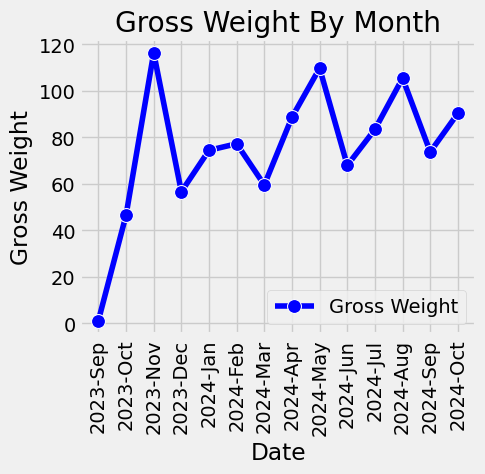

In [89]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.lineplot(x='formatted_date',y='Gross Weight',data=sa2,marker='o',markersize=10,linestyle='-',color='blue',label='Gross Weight')
plt.title('Gross Weight By Month')
plt.legend(loc='lower right')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

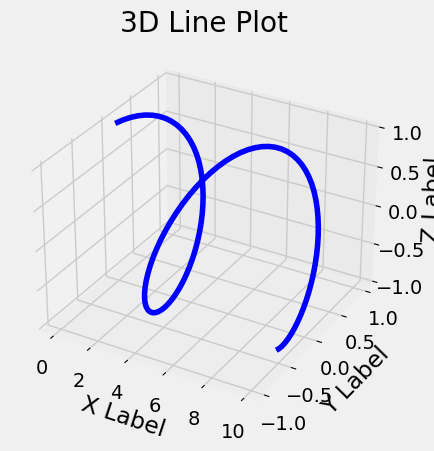

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create sample data
x = np.linspace(0, 10, 100)  # X values
y = np.sin(x)                 # Y values
z = np.cos(x)                 # Z values

# Create a new figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D line
ax.plot(x, y, z, linestyle='-', color='b')

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Line Plot')

# Show the plot
plt.show()


In [91]:
sa3=sales[['Gross Weight','Product']].groupby('Product').sum().reset_index()
sa3['Gross Weight']=abs(round((sa3['Gross Weight']/1000),2))


In [92]:
import plotly.express as px
import plotly.graph_objects as go

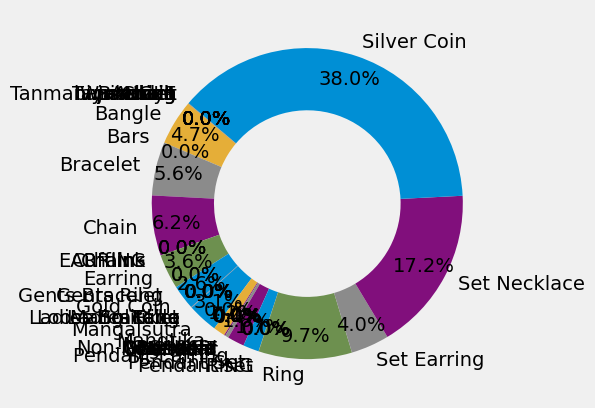

In [93]:
plt.pie(sa3['Gross Weight'],labels=sa3['Product'],autopct='%1.1f%%', startangle=140, 
        wedgeprops={'width': 0.4}, pctdistance=0.85, labeldistance=1.1)
plt.show()

In [94]:
fig2.data[0].name

''

In [100]:
fig2=px.line(x=sa2['formatted_date'],y=sa2['Gross Weight']
             ,markers=True,color_discrete_sequence=px.colors.qualitative.Pastel
             ,labels={'Gross Weight': 'Gross Weight'})
# fig2=go.Figure()c

fig2.update_layout(
    title_text='Gross Weight By Month',
    width=800,   # Set width of the figure
    height=400,  # Set height of the figure
    showlegend=True
)

# Add x and y axis titles (not directly applicable to pie charts, but can be used for other charts)
fig2.update_xaxes(title_text='Formatted Date')  # X-axis title
fig2.update_yaxes(title_text='Gross Weight') 
fig2.show()

In [98]:
fig=px.pie(names=sa3['Product'],values=sa3['Gross Weight'],hole=0.4,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')  # Customize labels inside the chart
fig.update_layout(title_text='Gross Weight By Product Category')


fig.show()

In [104]:
import plotly.express as px
import pandas as pd

# Sample data creation for demonstration
data = {
    'formatted_date': ['2024-Jan', '2024-Feb', '2024-Mar', '2024-Apr', '2024-May'],
    'Gross Weight A': [10, 15, 12, 20, 25],
    'Gross Weight B': [5, 10, 15, 12, 20]
}
sa2 = pd.DataFrame(data)

# Melt the DataFrame for better compatibility with Plotly Express
sa2_melted = sa2.melt(id_vars='formatted_date', value_vars=['Gross Weight A', 'Gross Weight B'],
                      var_name='Category', value_name='Weight')

# Create a line plot
fig2 = px.line(
    sa2_melted, 
    x='formatted_date', 
    y='Weight', 
    color='Category',  # This will create separate lines for each category
    markers=True
)

# Update layout
fig2.update_layout(
    title_text='Gross Weight By Month',
    width=800,
    height=400,
)

# Set x and y axis titles
fig2.update_xaxes(title_text='Formatted Date')
fig2.update_yaxes(title_text='Gross Weight')

# Show the figure
fig2.show()
